# データセットのロード、加工

In [5]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris() #Irisデータセットをロード
X = iris.data[:, [2,3]] #3,4列目の特徴量を抽出
y = iris.target #クラスラベルを取得

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
) #トレーニングデータとテストデータに分割、全体の30%をテストデータに

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) #トレーニングデータの平均と標準偏差を計算
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# モデルのインポートと学習データのフィット

In [8]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1,random_state=1) #n_iterでなくmax_iter
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [9]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) #テストと予測が一致しない＝誤分類の個数を表示

Misclassified samples: 1


# 可視化

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  #マーカーとカラーマップの準備
  markers = ('s', 'x', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) #クラスラベルに色を割り当てる

  #決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  #グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  #各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  #予測結果をもとのグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  #グリッドポイントの等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  #軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #クラスごとにサンプルをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

    #テストサンプルを目立たせる
    if test_idx:
      #すべてのサンプルをプロット
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],
                  c='none',
                  edgecolor='black',
                  alpha=1.0,
                  linewidth=1,
                  marker='o',
                  s=100,
                  label='test set')

<ipython-input-20-8a4595a74d89>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


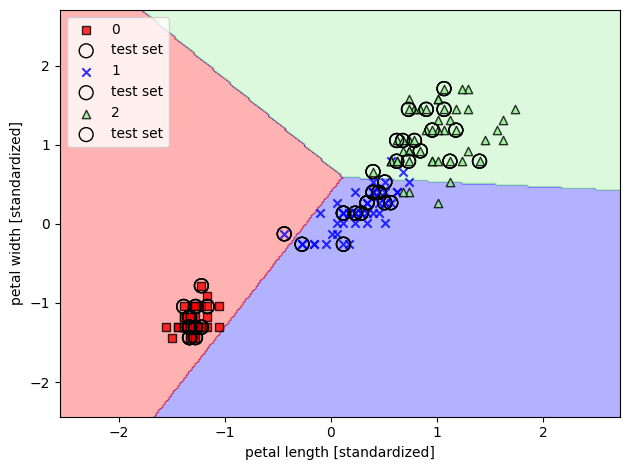

In [23]:
#トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
#決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

#軸のラベル設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
#凡例設定
plt.legend(loc='upper left')

#グラフを表示
plt.tight_layout()
plt.show()